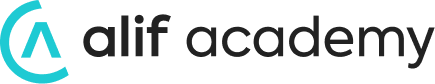

# Модуль 1.1: Python для аналитиков

### Урок №9: Оконные функции в pandas

В pandas есть еще такая концепция под названием "оконные функции". Предлагаю вам самостоятельно ознакомиться с этой концепцией, так как на занятиях мы не успели сделать это

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [3]:
sales_team  = pd.read_csv('/Users/otabekmamatkulov/Documents/GitHub/python_lessons_alif/lesson 9/data/sales_team.csv')
order_leads = pd.read_csv('/Users/otabekmamatkulov/Documents/GitHub/python_lessons_alif/lesson 9/data/order_leads.csv')
invoices    = pd.read_csv('/Users/otabekmamatkulov/Documents/GitHub/python_lessons_alif/lesson 9/data/invoices.csv')

In [4]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [5]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Sales Rep'   : 'Sales_Rep', 
                                        'Sales_Rep_Id': 'Sales Rep Id'})

In [6]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

In [7]:
order_leads = order_leads.rename(columns={'Order Id': 'Order_Id', 
                                          'Company Id': 'Company_Id', 
                                          'Company Name': 'Company_Name', 
                                          'Order Value': 'Order_Value'})

In [8]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['Company_Name', 'Company_Id'])

In [9]:
order_leads_with_team_data.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted,Sales_Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [10]:
top_sales = order_leads_with_team_data.groupby(['Sales_Rep'], as_index=False) \
    .agg({'Converted': 'mean'}) \
    .sort_values('Converted') \
    .tail(10)

In [11]:
all_sales = order_leads_with_team_data.groupby(['Sales_Rep'], as_index=False) \
    .agg({'Converted': 'mean'}) \
    .sort_values('Converted') 

/Users/otabekmamatkulov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Converted'>

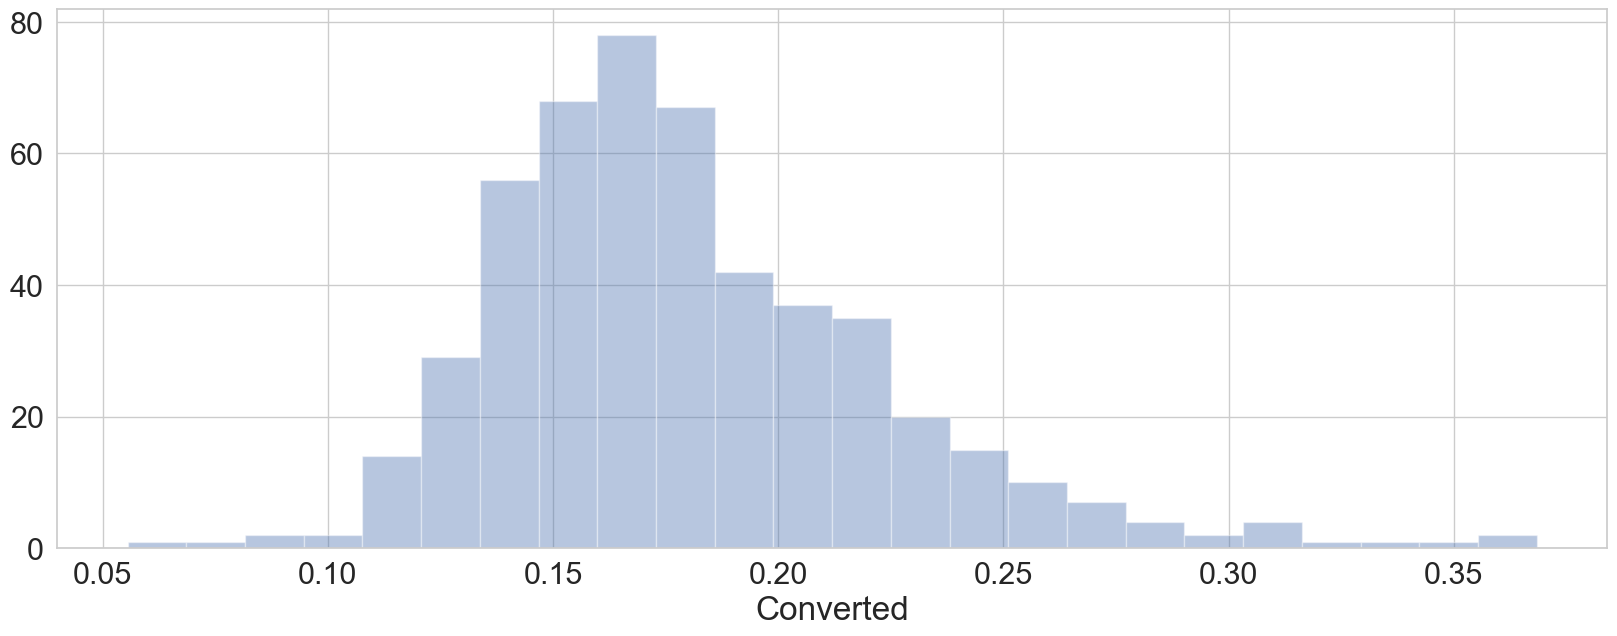

In [12]:
sns.distplot(all_sales.Converted, kde=False)

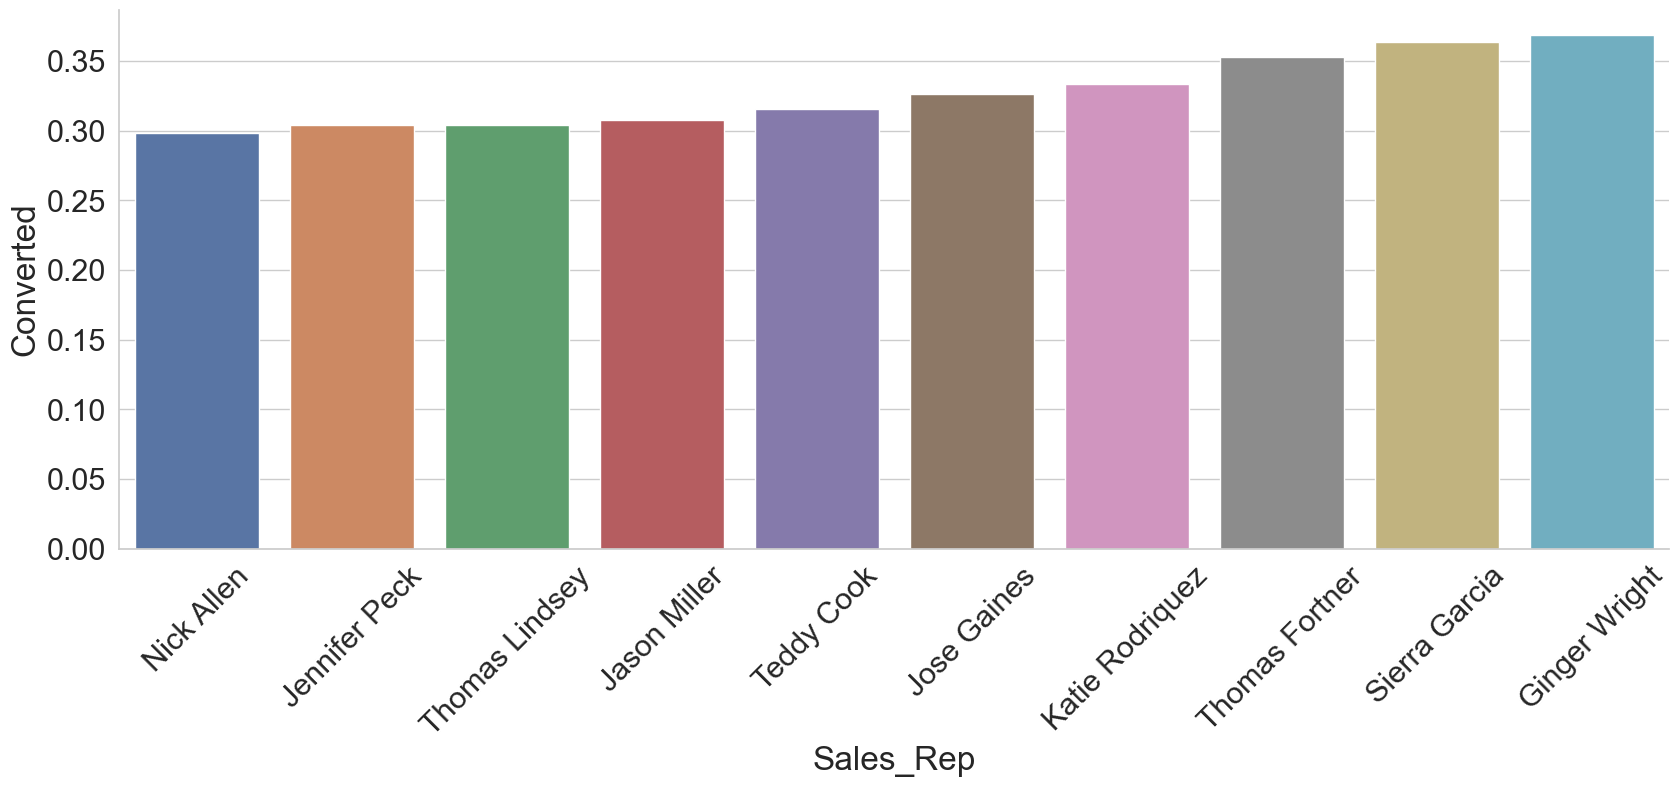

In [13]:
ax = sns.barplot(data=top_sales, y='Converted', x='Sales_Rep')
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45)
sns.despine()

In [14]:
order_leads.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [15]:
# График CR по дням

In [16]:
cr_by_day = order_leads.groupby(['Date']) \
    .agg({'Converted': 'mean'}) \
    .rename(columns={'Converted': 'CR'}) \
    .sort_values('Date')

<AxesSubplot:xlabel='Date'>

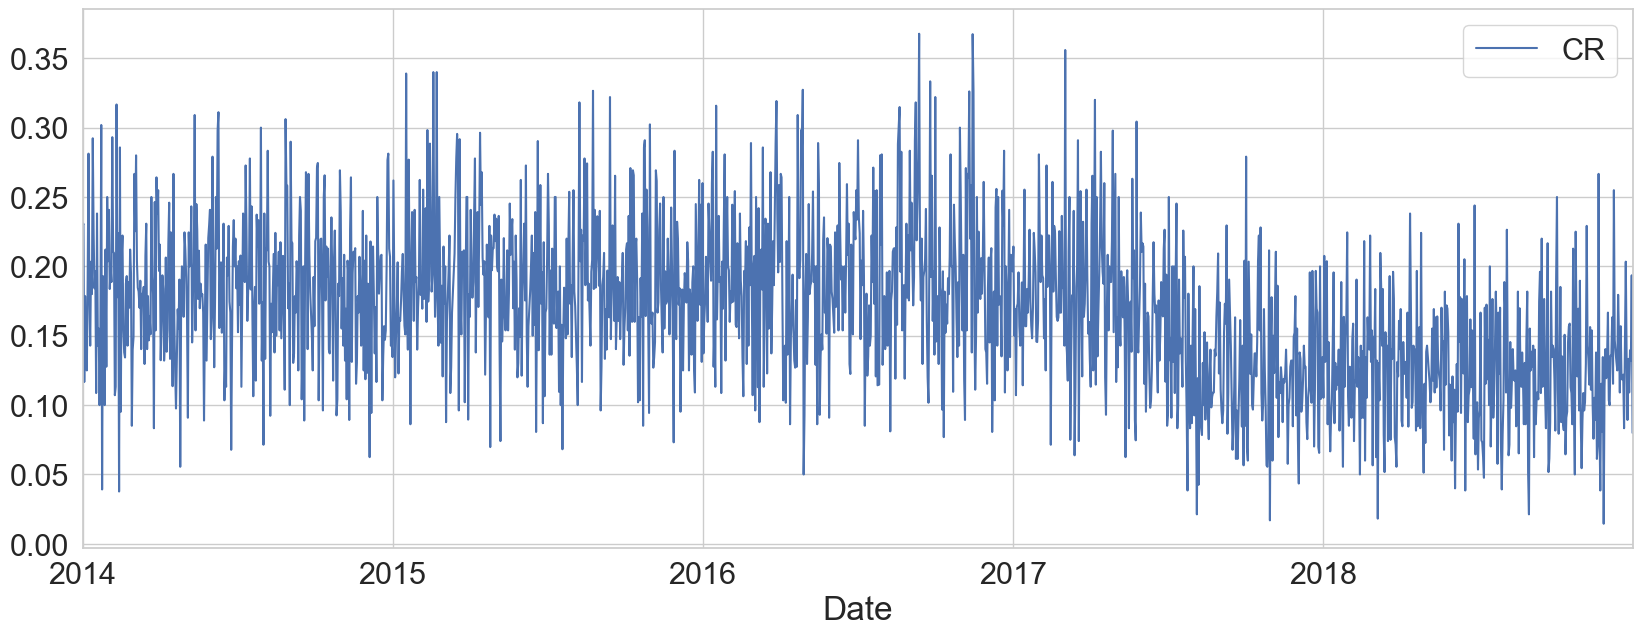

In [17]:
cr_by_day.plot()

In [18]:
cr_by_day_rolling = order_leads.groupby(['Date']) \
    .agg({'Converted': 'mean'}) \
    .rename(columns={'Converted': 'CR'}) \
    .sort_values('Date') \
    .rolling(30).mean()

/var/folders/n0/smq5fg256x31yyqwtsnfdpwr0000gn/T/ipykernel_6222/486100529.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


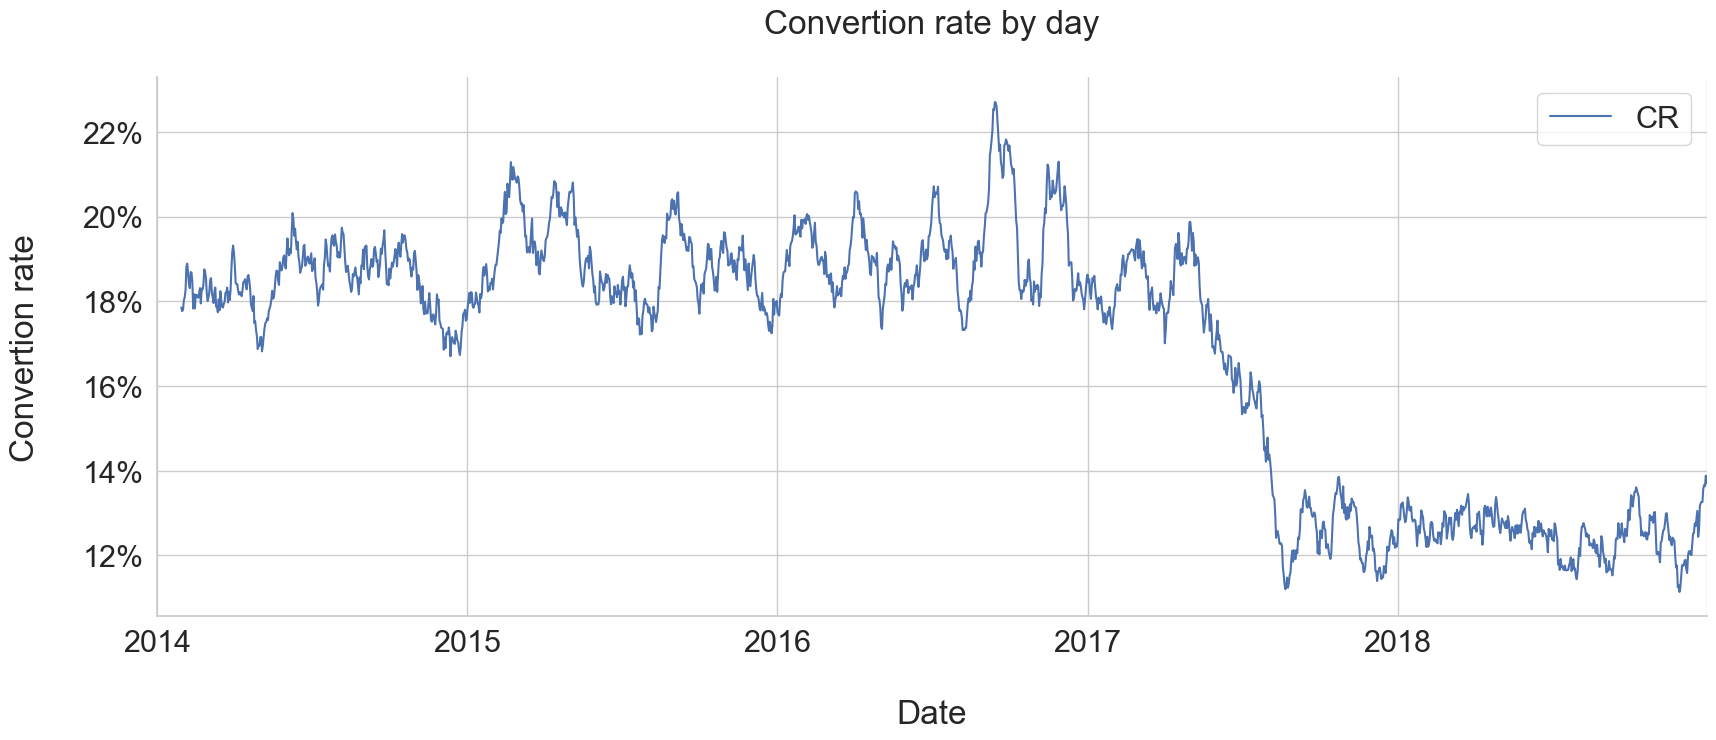

In [19]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')
ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
sns.despine()

In [20]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
    sns.despine()

/var/folders/n0/smq5fg256x31yyqwtsnfdpwr0000gn/T/ipykernel_6222/2333262559.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


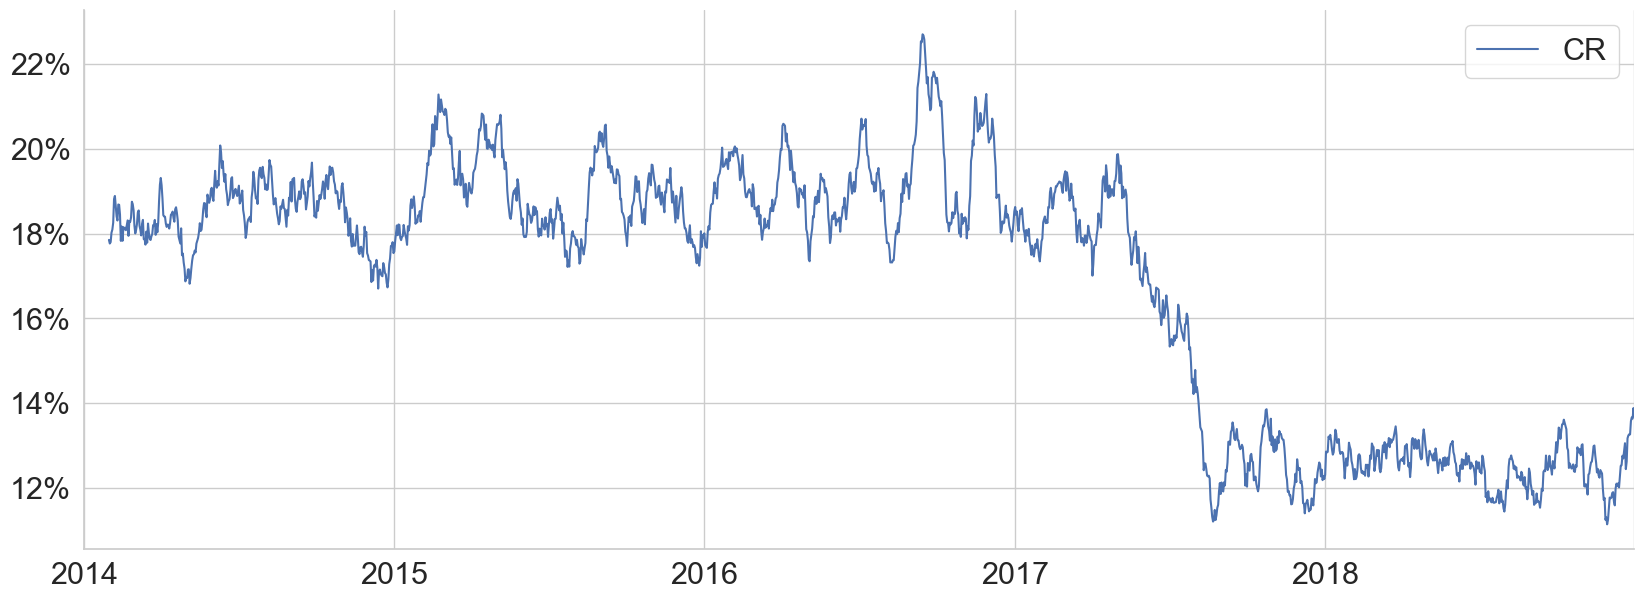

In [21]:
get_plot(cr_by_day_rolling)

In [22]:
cr_by_day_rolling_ = cr_by_day_rolling.reset_index().dropna()

In [23]:
cr_by_day_rolling_.head()

,Date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944
